In [35]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data -o parkinsons.data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40697  100 40697    0     0  20471      0  0:00:01  0:00:01 --:--:-- 20461


In [41]:
import pandas as pd
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,...,0.07,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,...,0.09,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,...,0.08,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,...,0.09,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,...,0.10,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41


In [37]:
df.shape

(195, 24)

In [38]:
df.isnull().values.any()

False

In [40]:
df.isnull().sum()


name           0
MDVP:Fo(Hz)    0
              ..
D2             0
PPE            0
Length: 24, dtype: int64

In [45]:
df.status.value_counts()


1    147
0     48
Name: status, dtype: int64

In [50]:
features =df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [53]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train);

In [55]:
predictions = rf.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.15


In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.15384615384615385
Mean Squared Error: 0.15384615384615385
Root Mean Squared Error: 0.3922322702763681


In [57]:
baseline_preds = x_test[:, a.index('status')]
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.76


In [61]:
from sklearn.metrics import average_precision_score,confusion_matrix,f1_score,recall_score,roc_auc_score,precision_score
confusion_matrix(y_test,predictions)

array([[ 3,  4],
       [ 2, 30]])

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



In [63]:
roc_auc_score(y_test,predictions)

0.6830357142857143

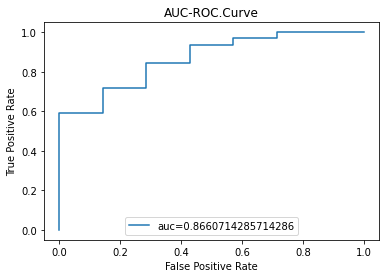

array([0.     , 0.03125, 0.59375, 0.59375, 0.71875, 0.71875, 0.84375,
       0.84375, 0.9375 , 0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_pred_proba=rf.predict_proba(x_test)[::,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC.Curve')

plt.legend (loc=8)
plt.show()
tpr

In [65]:
rf.score(x_test, y_test)

0.8461538461538461